<a href="https://colab.research.google.com/github/sandeep-kumar-barada/Malticlass-Cyberbully-Detection-using-Support-Vector-Mchine/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

github_url='https://github.com/mohamadahj/Cyberbully-Detection-Dataset/raw/main/cb_multi_labeled_balanced.csv'

data=pd.read_csv(github_url)
data.head()

,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion


In [2]:
data['label'].unique()

array(['ethnicity/race', 'not_cyberbullying', 'religion', 'gender/sexual'],
      dtype=object)

In [3]:
nltk.download('punkt_tab')
nltk.download('stopwords')
device='cuda'
def clean_text(text):
     text = text.lower()
     text = re.sub(r"http\\S+|www\\S+|https\\S+", '', text)
     text = re.sub(r"@\\w+|#\\w+", '', text)
     text = text.encode('ascii', 'ignore').decode('ascii') # remove emojis
     text = text.translate(str.maketrans('', '', string.punctuation))
     text = re.sub(r"\\d+", '', text)
     tokens = word_tokenize(text)
     tokens = [word for word in tokens if word not in stopwords.words('english')]
     return ' '.join(tokens)

# Apply the cleaning function
data['cleaned_text'] = data['text'].apply(clean_text)

# Preview the cleaned data
data[['text', 'cleaned_text']].head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,cleaned_text
0,@ZubearSays Any real nigga isn't letting this ...,zubearsays real nigga isnt letting happen
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,moradoskittle prolifejewess daconsult kellyyod...
2,"the only thing i wish, i wish a nigga would",thing wish wish nigga would
3,You saudias are not friends of Muslim idiots c...,saudias friends muslim idiots cheapless people
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,jaydent2399 tractorlaw holmesgael erconger acy...


In [4]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'].apply(lambda x: x.split(',')))

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text'])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [13]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
model=OneVsRestClassifier(LinearSVC())
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=LinearSVC())

In [15]:
from sklearn.metrics import classification_report,multilabel_confusion_matrix
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
print(multilabel_confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3419
           1       0.99      0.99      0.99      3430
           2       0.99      1.00      1.00     10045
           3       1.00      0.98      0.99      3104

   micro avg       0.99      0.99      0.99     19998
   macro avg       0.99      0.99      0.99     19998
weighted avg       0.99      0.99      0.99     19998
 samples avg       0.99      0.99      0.99     19998

[[[16546    33]
  [   24  3395]]

 [[16541    27]
  [   31  3399]]

 [[ 9885    68]
  [    8 10037]]

 [[16890     4]
  [   60  3044]]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


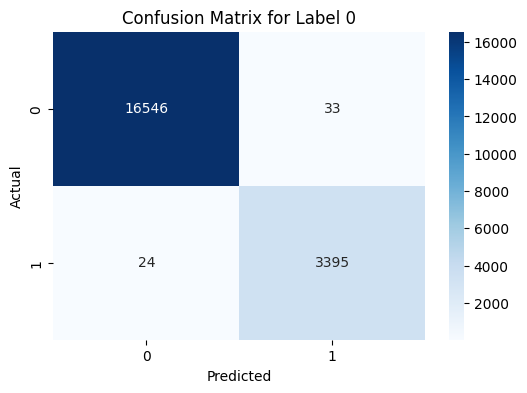

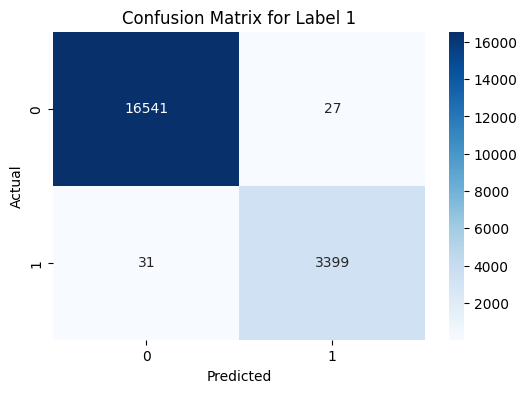

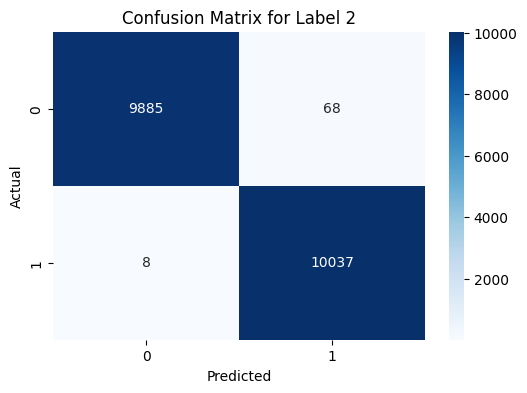

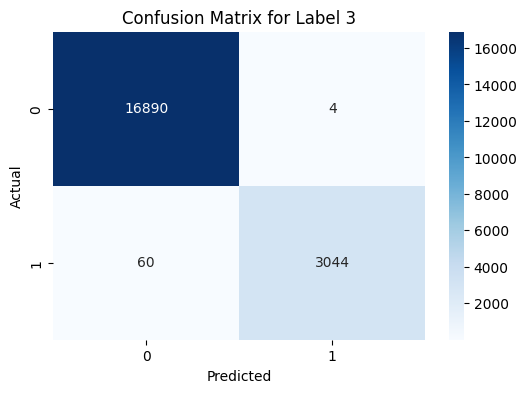

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
confusion_matrices=multilabel_confusion_matrix(y_test,y_pred)
for i, cm in enumerate(confusion_matrices):
    plt.figure(figsize=(6, 4))
    sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='Blues') # Use fmt='d' for integer annotations
    plt.title(f'Confusion Matrix for Label {i}') # Add a title for clarity
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()